# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"] - 273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labrador city
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | shingu
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | camapua
Processing Record 8 of Set 1 | nakhon thai
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | acara
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | cidade velha
Processing Record 13 of Set 1 | al ghayzah
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 

Processing Record 40 of Set 4 | akrehamn
Processing Record 41 of Set 4 | dowlatabad
Processing Record 42 of Set 4 | pizarro
Processing Record 43 of Set 4 | port mathurin
Processing Record 44 of Set 4 | katsuren-haebaru
Processing Record 45 of Set 4 | san jose village
City not found. Skipping...
Processing Record 46 of Set 4 | san antonio de pale
Processing Record 47 of Set 4 | klyuchi
Processing Record 48 of Set 4 | nyurba
Processing Record 49 of Set 4 | pacasmayo
Processing Record 0 of Set 5 | salinas
Processing Record 1 of Set 5 | salavan
Processing Record 2 of Set 5 | borogontsy
Processing Record 3 of Set 5 | kinango
Processing Record 4 of Set 5 | kudahuvadhoo
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | wau
Processing Record 7 of Set 5 | dvurechensk
Processing Record 8 of Set 5 | mossel bay
Processing Record 9 of Set 5 | anna regina
Processing Record 10 of Set 5 | muisne
Processing Record 11 of Set 5 | wenchang
Processing Record 12 of Set 5 | fort st. jo

Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | tubarjal
Processing Record 31 of Set 8 | bratsk
Processing Record 32 of Set 8 | robertsport
Processing Record 33 of Set 8 | ouellah
City not found. Skipping...
Processing Record 34 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 35 of Set 8 | yagry
City not found. Skipping...
Processing Record 36 of Set 8 | chonchi
Processing Record 37 of Set 8 | taroa
Processing Record 38 of Set 8 | saacow
Processing Record 39 of Set 8 | karyes
Processing Record 40 of Set 8 | cabinda
Processing Record 41 of Set 8 | maizuru
Processing Record 42 of Set 8 | tura
Processing Record 43 of Set 8 | sainte-suzanne
Processing Record 44 of Set 8 | port lincoln
Processing Record 45 of Set 8 | disa
Processing Record 46 of Set 8 | la'ie
Processing Record 47 of Set 8 | janja
Processing Record 48 of Set 8 | kamiiso
Processing Record 49 of Set 8 | cumana
Processing Record 0 of Set 9 | taltal
Processing Record 1 of Set 9 | howrah
Pr

Processing Record 19 of Set 12 | male
Processing Record 20 of Set 12 | ribe
Processing Record 21 of Set 12 | conduaga
Processing Record 22 of Set 12 | port isabel
Processing Record 23 of Set 12 | nsanje
Processing Record 24 of Set 12 | tevragh zeina
City not found. Skipping...
Processing Record 25 of Set 12 | villa gesell
Processing Record 26 of Set 12 | maxixe
Processing Record 27 of Set 12 | sinabang
Processing Record 28 of Set 12 | ponta delgada
Processing Record 29 of Set 12 | mokhotlong
Processing Record 30 of Set 12 | aral
Processing Record 31 of Set 12 | hachinohe
Processing Record 32 of Set 12 | langzhong
Processing Record 33 of Set 12 | asau
Processing Record 34 of Set 12 | the pas
Processing Record 35 of Set 12 | quellon
Processing Record 36 of Set 12 | narasannapeta
Processing Record 37 of Set 12 | pelabuhanratu
Processing Record 38 of Set 12 | ibiza
Processing Record 39 of Set 12 | mopti
Processing Record 40 of Set 12 | kirillov
Processing Record 41 of Set 12 | santa marta


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labrador city,52.9463,-66.9114,1.95,44,75,6.69,CA,1684774001
1,ushuaia,-54.8000,-68.3000,3.79,81,0,1.03,AR,1684773905
2,hermanus,-34.4187,19.2345,15.45,62,100,3.13,ZA,1684773929
3,aykhal,66.0000,111.5000,-1.50,98,100,2.75,RU,1684773905
4,shingu,33.7333,135.9833,18.15,89,100,1.87,JP,1684774361


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labrador city,52.9463,-66.9114,1.95,44,75,6.69,CA,1684774001
1,ushuaia,-54.8000,-68.3000,3.79,81,0,1.03,AR,1684773905
2,hermanus,-34.4187,19.2345,15.45,62,100,3.13,ZA,1684773929
3,aykhal,66.0000,111.5000,-1.50,98,100,2.75,RU,1684773905
4,shingu,33.7333,135.9833,18.15,89,100,1.87,JP,1684774361


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

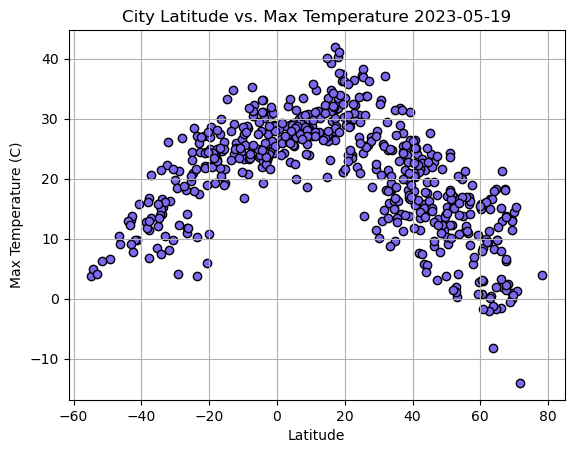

In [8]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

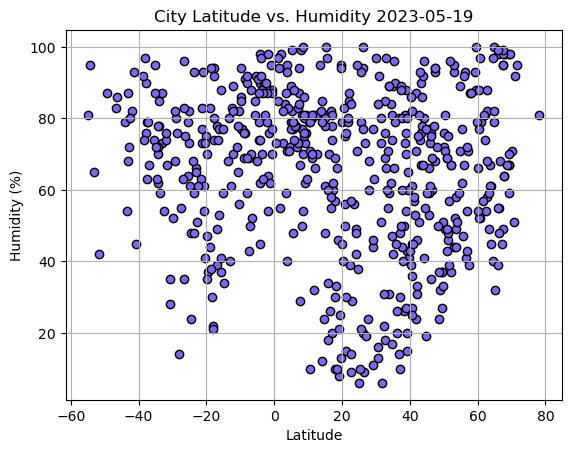

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

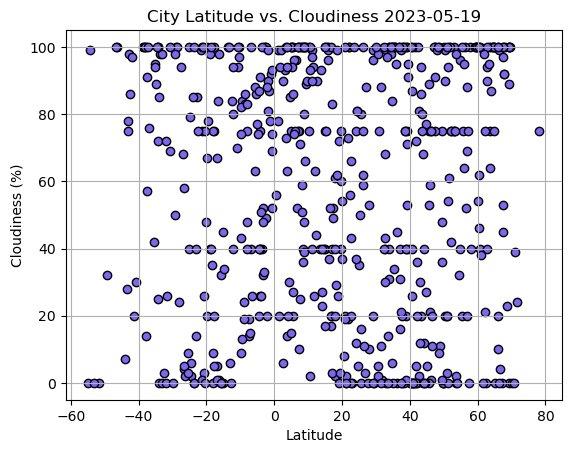

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

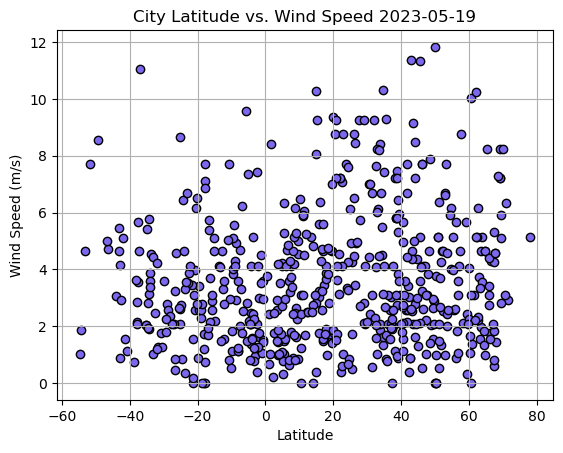

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Define Model:
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
# Create regression line and add to plot
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

# Calculate and plot Pearson's r value
    print(f"The r-value is: {rvalue}")
    
# Remaining graphical elements for all plots
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
    return line_eq, rvalue

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labrador city,52.9463,-66.9114,1.95,44,75,6.69,CA,1684774001
3,aykhal,66.0000,111.5000,-1.50,98,100,2.75,RU,1684773905
4,shingu,33.7333,135.9833,18.15,89,100,1.87,JP,1684774361
7,nakhon thai,17.1006,100.8374,26.42,78,83,1.49,TH,1684774361
9,albany,42.6001,-73.9662,21.56,51,2,0.89,US,1684773749


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()
lat_all_north = southern_hemi_df["Lat"]
temp_all_north = southern_hemi_df["Max Temp"]
humid_all_north = northern_hemi_df["Humidity"]
cloud_all_north = northern_hemi_df["Cloudiness"]
wind_all_north = northern_hemi_df["Wind Speed"]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,3.79,81,0,1.03,AR,1684773905
2,hermanus,-34.4187,19.2345,15.45,62,100,3.13,ZA,1684773929
5,west island,-12.1568,96.8225,25.99,89,40,1.54,CC,1684773917
6,camapua,-19.5314,-54.0439,28.63,37,78,3.41,BR,1684774361
8,acara,-1.9608,-48.1967,30.59,64,81,1.61,BR,1684774361


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: -0.7737291571435859


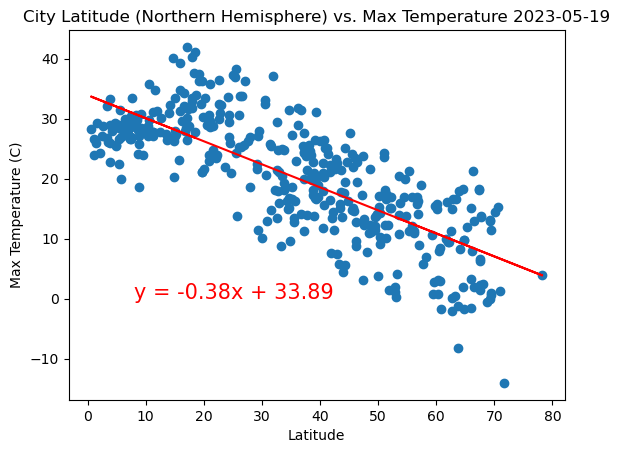

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regEQplotX = 8
regEQplotY = 0
# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Northern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (8, 0), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig5.png")

# Show plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.7806513442082919


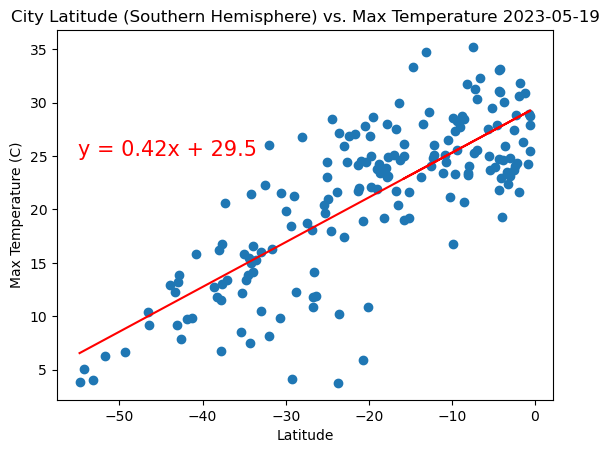

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

regEQplotX = -55
regEQplotY = 25

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Southern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 
Northeren Hemisphere : The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: -0.0026867036760951026


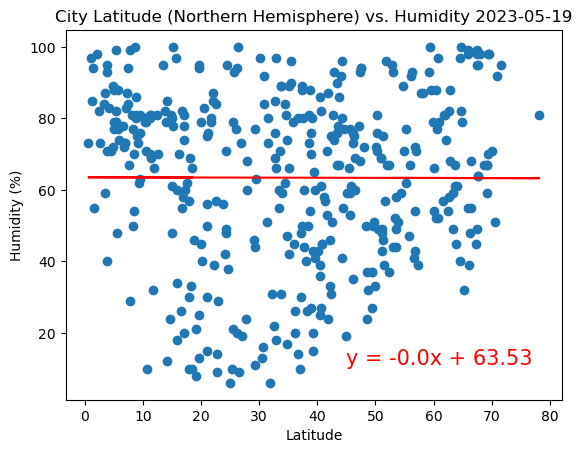

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regEQplotX = 45
regEQplotY = 11

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Northern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (45, 11), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig7.png")

# Show the plot
plt.show()

The r-value is: 0.0896219389577796Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



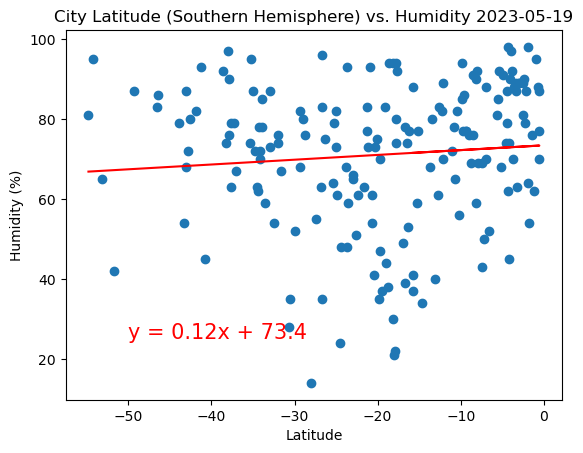

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regEQplotX = -50
regEQplotY = 25

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig8.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
Southern Hemisphere : The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: -0.01976198648444689


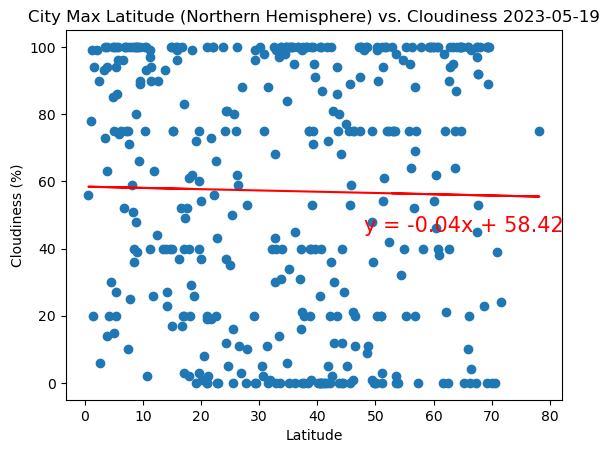

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regEQplotX = 48
regEQplotY = 45

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (48, 45), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig9.png")

# Show the plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.030105748534917032


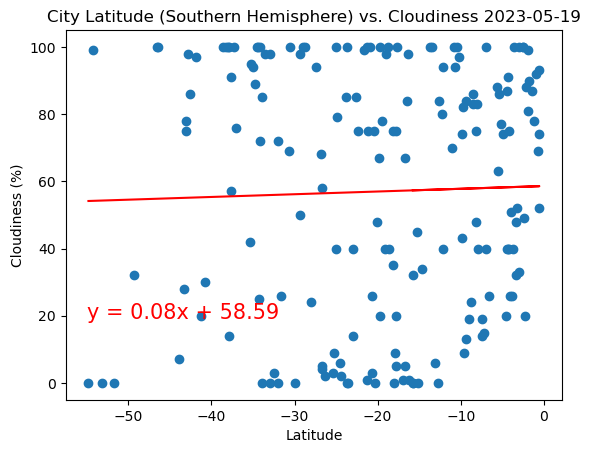

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regEQplotX = -55
regEQplotY = 19

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 19), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig10.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere : The regression does not display much of a correlation between the data sets.
Southern hemisphere : The regression does not display much of a correlation between the data sets.

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.06792091969287203


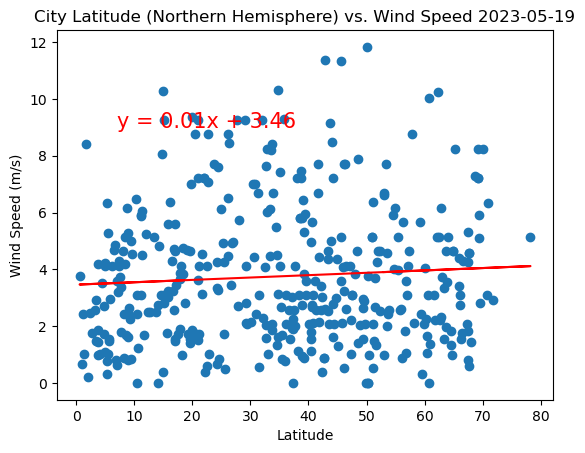

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regEQplotX = 7
regEQplotY = 9

# Label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (7, 9), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig11.png")

# Show the plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: -0.1379733218499803


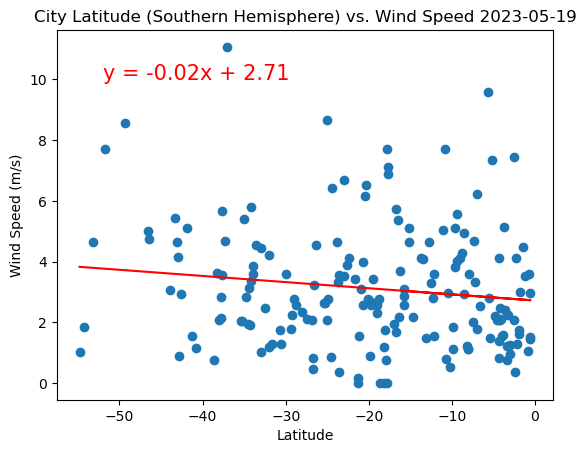

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Southern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-52, 10), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig12.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere :The regression does not display much of a correlation between the data sets.
Southern Hemisphere : The regression does not display much of a correlation between the data sets.